### 06.5 实现逻辑与或非门

#### 6.5.1 实现逻辑非门
<img src="https://microsoft.github.io/ai-edu/%E5%9F%BA%E7%A1%80%E6%95%99%E7%A8%8B/A2-%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%9F%BA%E6%9C%AC%E5%8E%9F%E7%90%86/%E7%AC%AC3%E6%AD%A5%20-%20%E7%BA%BF%E6%80%A7%E5%88%86%E7%B1%BB/img/6/LogicNot2.png">

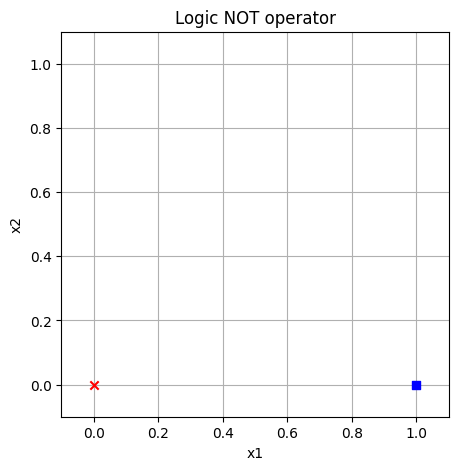

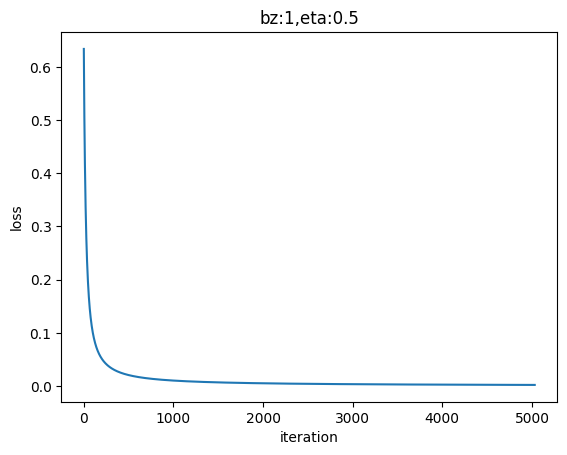

W= [[-12.46885652]]
B= [[6.03109485]]
[[0.9976029 ]
 [0.00159743]]
False


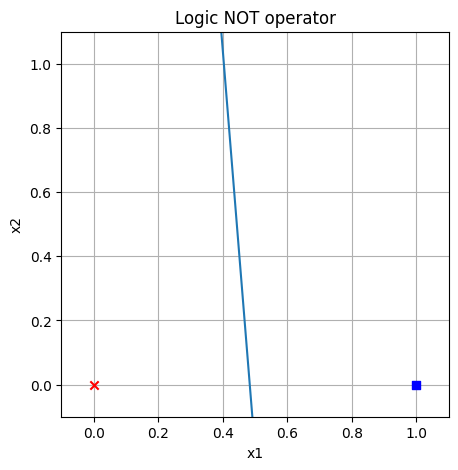

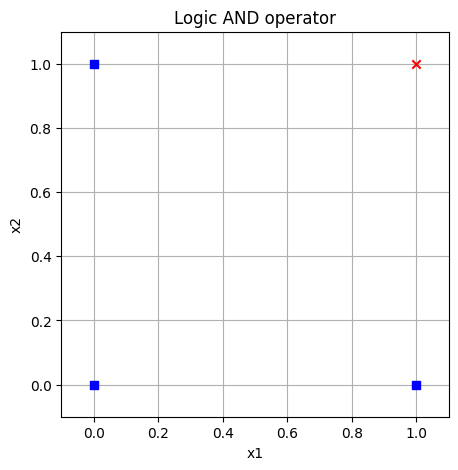

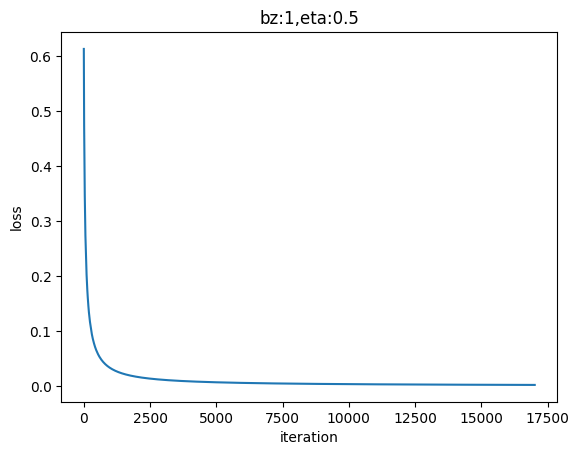

W= [[11.76501893]
 [11.76531572]]
B= [[-17.81604908]]
[[2.35059514e-03]
 [1.83057778e-08]
 [9.96712338e-01]
 [2.34989925e-03]]
True


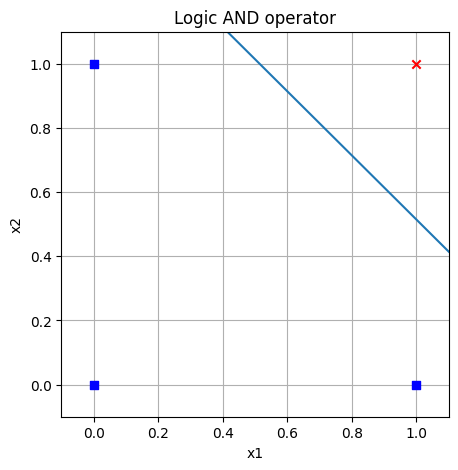

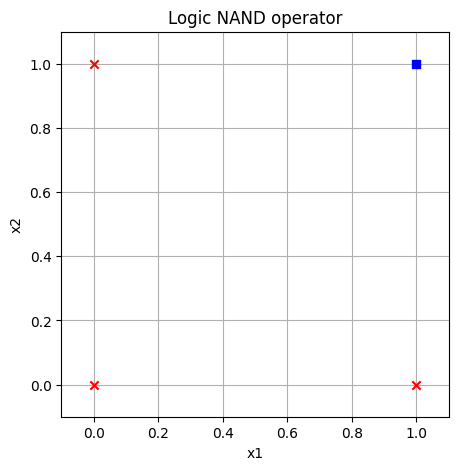

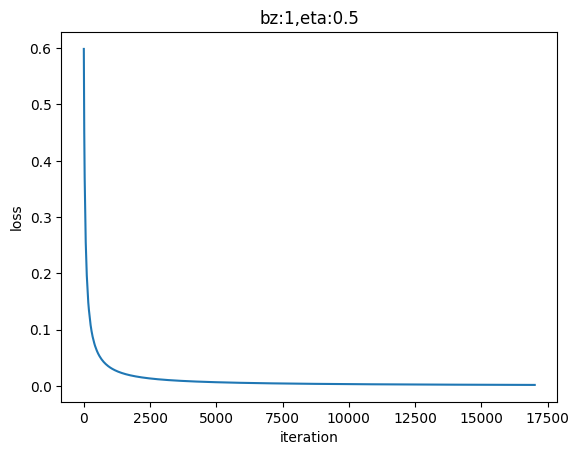

W= [[-11.76531831]
 [-11.76541333]]
B= [[17.81556036]]
[[0.99999998]
 [0.99764825]
 [0.99764803]
 [0.00328476]]
True


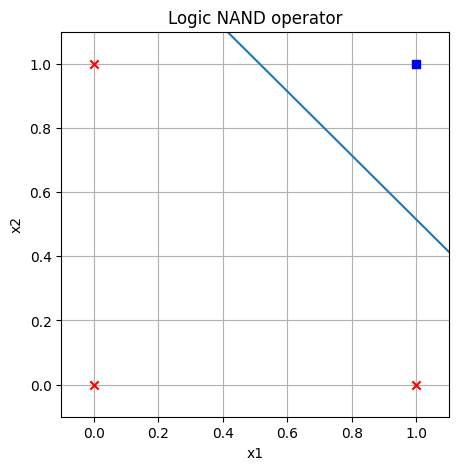

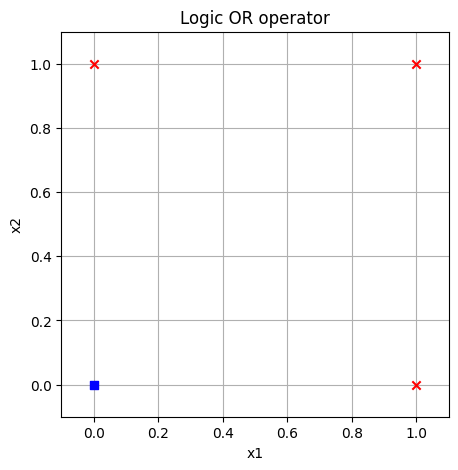

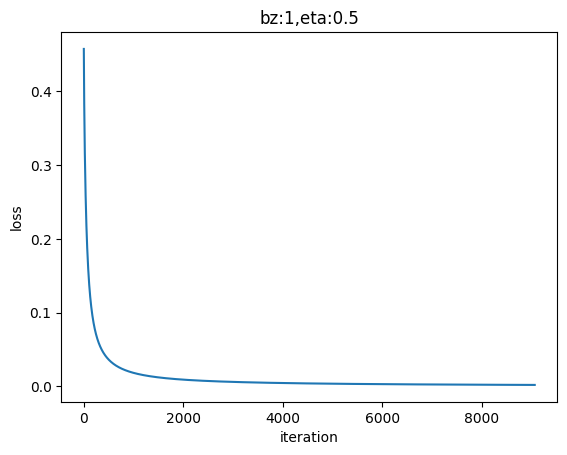

W= [[11.74561538]
 [11.7460252 ]]
B= [[-5.41340212]]
[[0.99822579]
 [0.00443668]
 [0.99822506]
 [0.99999999]]
True


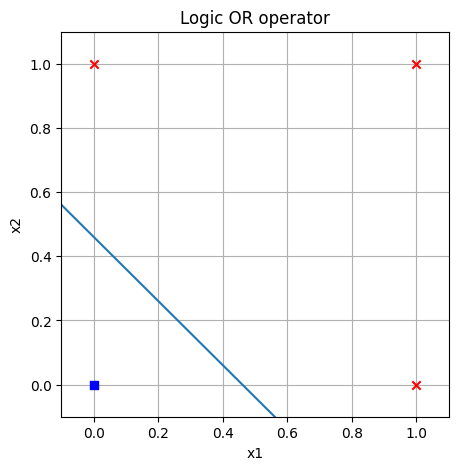

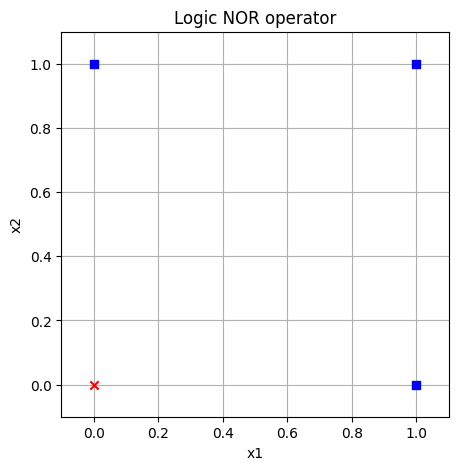

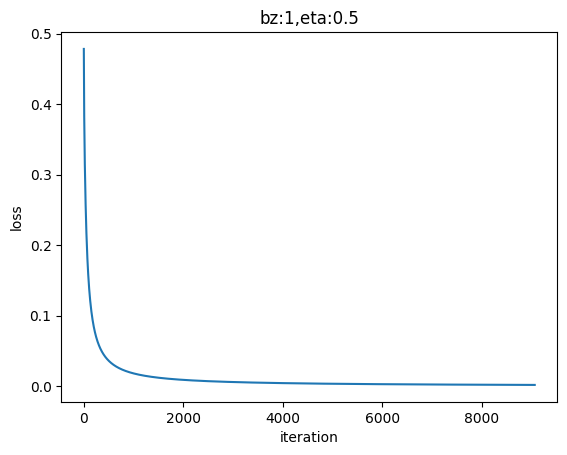

W= [[-11.74611127]
 [-11.74570216]]
B= [[5.41342786]]
[[1.77410520e-03]
 [9.95563433e-01]
 [1.40817586e-08]
 [1.77482986e-03]]
True


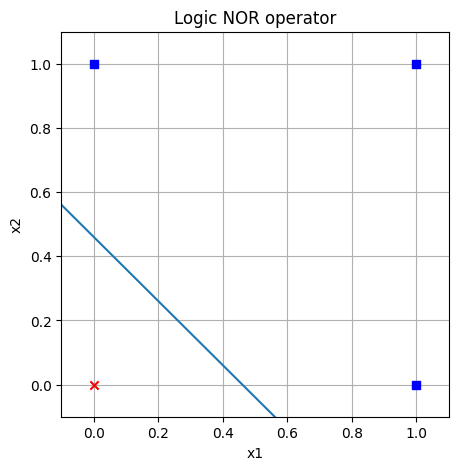

In [5]:
# Copyright (c) Microsoft. All rights reserved.
# Licensed under the MIT license. See LICENSE file in the project root for full license information.
import numpy as np
import matplotlib.pyplot as plt

from HelperClass.NeuralNet_1_2 import *
from HelperClass.Visualizer_1_0 import *


class LogicDataReader(DataReader_1_1):
    def __init__(self):
        pass

    def Read_Logic_NOT_Data(self):
        X = np.array([0,1]).reshape(2,1)
        Y = np.array([1,0]).reshape(2,1)
        self.XTrain = self.XRaw = X
        self.YTrain = self.YRaw = Y
        self.num_train = self.XRaw.shape[0]

    def Read_Logic_AND_Data(self):
        X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)
        Y = np.array([0,0,0,1]).reshape(4,1)
        self.XTrain = self.XRaw = X
        self.YTrain = self.YRaw = Y
        self.num_train = self.XRaw.shape[0]

    def Read_Logic_NAND_Data(self):
        X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)
        Y = np.array([1,1,1,0]).reshape(4,1)
        self.XTrain = self.XRaw = X
        self.YTrain = self.YRaw = Y
        self.num_train = self.XRaw.shape[0]

    def Read_Logic_OR_Data(self):
        X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)
        Y = np.array([0,1,1,1]).reshape(4,1)
        self.XTrain = self.XRaw = X
        self.YTrain = self.YRaw = Y
        self.num_train = self.XRaw.shape[0]

    def Read_Logic_NOR_Data(self):
        X = np.array([0,0,0,1,1,0,1,1]).reshape(4,2)
        Y = np.array([1,0,0,0]).reshape(4,1)
        self.XTrain = self.XRaw = X
        self.YTrain = self.YRaw = Y
        self.num_train = self.XRaw.shape[0]

   
def Test(net, reader):
    X,Y = reader.GetWholeTrainSamples()
    A = net.inference(X)
    print(A)
    diff = np.abs(A-Y)
    result = np.where(diff < 1e-2, True, False)
    if result.sum() == 4:
        return True
    else:
        return False

def draw_split_line(net):
    if (net.W.shape[0] == 2):
        w = -net.W[0,0] / net.W[1,0]
        b = -net.B[0,0] / net.W[1,0]
    else:
        w = net.W[0]
        b = net.B[0]
    x = np.array([-0.1,1.1])
    y = w * x + b
    plt.plot(x,y)
   
def draw_source_data(reader, title, show=False):
    fig = plt.figure(figsize=(5,5))
    plt.grid()
    plt.axis([-0.1,1.1,-0.1,1.1])
    plt.title(title)
    X,Y = reader.GetWholeTrainSamples()
    if title == "Logic NOT operator":
        DrawTwoCategoryPoints(X[:,0], np.zeros_like(X[:,0]), Y[:,0], title=title, show=show)
    else:
        DrawTwoCategoryPoints(X[:,0], X[:,1], Y[:,0], title=title, show=show)

def train(reader, title):
    draw_source_data(reader, title, show=True)
    # net train
    num_input = reader.XTrain.shape[1]
    num_output = 1
    hp = HyperParameters_1_1(num_input, num_output, eta=0.5, max_epoch=10000, batch_size=1, eps=2e-3, net_type=NetType.BinaryClassifier)
    net = NeuralNet_1_2(hp)
    net.train(reader, checkpoint=1)
    # test
    print(Test(net, reader))
    # visualize
    draw_source_data(reader, title, show=False)
    draw_split_line(net)
    plt.show()

if __name__ == '__main__':
    reader = LogicDataReader()
    reader.Read_Logic_NOT_Data()
    train(reader, "Logic NOT operator")

    reader = LogicDataReader()
    reader.Read_Logic_AND_Data()
    train(reader, "Logic AND operator")

    reader = LogicDataReader()
    reader.Read_Logic_NAND_Data()
    train(reader, "Logic NAND operator")

    reader = LogicDataReader()
    reader.Read_Logic_OR_Data()
    train(reader, "Logic OR operator")

    reader = LogicDataReader()
    reader.Read_Logic_NOR_Data()
    train(reader, "Logic NOR operator")
